
<a href="https://colab.research.google.com/github/cs-pub-ro/ML/blob/master/lab/lab4/Laborator_4-Skel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Boosting
=======

* Mihai Trăscău, 2020



## 1. Scopul Laboratorului
Acest laborator revizitează tematica învățării cu ansamble ( _ensemble learning_ ), punându-se accentul pe concepte de **boosting**.

**Boosting** este un meta-algoritm care se bazează la fel ca și celelalte metode de _ensemble learning_ pe construirea unui clasificator _puternic_ utilizând o serie de clasificatori _slabi_ (eng. weak/base learner) care „decid împreună”.  
Cealaltă clasa principală de metode de _ensemble_ este **bagging**, al cărui algoritm exponent este *RandomForest*, care a fost studiat anterior.

În general, în boosting este permisă utilizarea oricărui tip de clasificator slab. 
Spre deosebire de algoritmii de tip bagging (unde instanțele de clasificatori slabi sunt antrenați independent), în boosting fiecare instanță de weak learner este antrenată și adăugată ansamblului în mod iterativ (a se vedea si figura de mai jos).

<div>
<img src="https://miro.medium.com/max/1276/1*8T4HEjzHto_V8PrEFLkd9A.png" width="700"/>
</div>



## 2. Noțiuni teoretice despre Boosting
### 2.1. AdaBoost
_AdaBoost_ este printre primele metode de boosting propuse [1][2] care a produs rezultate bune. Se bazează pe antrenarea unui ansamblu de clasificatori pentru care ipoteza ansamblului (predicția), $H_{T}(x)$, este dată de formula
$$
H_{T}(x) = \sum_{t=1}^{T}\rho_{t}h_{t}(x)
$$
unde $x$ reprezintă datele de intrare, $h_{t}(x)$ este ipoteza fiecărui clasificator slab din ansamblu iar $\rho_{t}$ este ponderea cu care acesta „participă” la decizie.

La ficare pas $t$ de antrenare este adăugat un nou clasificator slab (care produce ipoteza $h_{t}(x)$). Pentru a informa mai bine fiecare clasificator slab care va fi adăugat ulterior, AdaBoost se bazează pe adăugarea de ponderi pentru elementele din setul de date. După fiecare pas, setul de date de antrenare este reponderat astfel încât exemplele „dificile” de până la pasul $t$ să devină „prioritare” spre a fi clasificate corect de la pasul $t+1$.

Altfel spus, la fiecare pas este ales clasificatorul cu ipoteza $h_{t}$ care minimizează eroarea totală ponderată
$$
q_{i}^{(T-1)} = \sum_{y_{i}\neq h_{t}(x_{i})}e^{-y_{i}H_{T-1}(x_{i})}
$$
pentru care putem calcula rate de eroare
$$
\epsilon_{t} = \frac{\sum_{y_{i}\neq h_{t}(x_{i})} q_{i}^{(T-1)}}{\sum_{i=1}^{N} q_{i}^{(T-1)}}
$$
Astfel, putem determina ponderea noului clasificator ca fiind
$$
\rho_{t} = \frac{1}{2}ln(\frac{1-\epsilon_{t}}{\epsilon_{t}})
$$
ceea ce ne permite să formulăm $H_{T} = H_{T-1} + \rho_{t}h_{t}$

### 2.2. Gradient Boosting
#### A. Regresie
La fel ca AdaBoost și metoda Gradient Boosting antrenează clasificatori (regresori) slabi pe care îi adaugă la ansamblu. Însă, spre deosebire de AdaBoost exemplele din setul de antrenare pentru care sunt prezise valori greșite  nu primesc mai multă „importanță”. În schimb, se bazează pe calcularea _valorilor reziduale_ pentru fiecare exemplu în parte. 

Să presupunem că la pasul $t$ avem ipoteza $H_{T-1}$ pe care vrem să o îmbunătățim adăugând un nou clasificator (regresor). Astfel, predicția $y_{i}$ pentru fiecare exemplu dat $x_{i}$ va deveni
$$
H_{T-1}(x_{i}) + h_{t}(x_{i}) = y_{i}
$$
sau echivalent, considerăm că trebuie să găsim acel clasificator (regresor) pentru care
$$
h_{t}(x_{i}) = y_{i} - H_{T-1}
$$
Cum găsirea exactă a lui $h_{t}$ nu este posibilă, vom calcula o aproximare. Astfel, vom genera perechile $(x_{i}, y_{i} - F_{T-1}(x_{i}))$. Setul format din perechile de date de intrare și valori reziduale va fi utilizat pentru antrenarea unui nou clasificator (regresor), care prin predicția sa încearcă minimizarea erorii globale de predicție.

#### B. Clasificare (multi-clasă)
Gradient Boosting aplicat pe probleme de clasificare aduce o serie de modificări. În primul rând, în loc de o valoare (regresie) ansamblul trebuie să prezică clasa $C_{k}$ din care face parte exemplul $x_{i}$. Pentru a realiza acest lucru vom genera $N$ ipoteze corespunzătoare probabilităților de apartenență la fiecare din cele $N$ clase în parte
$$
P(C_{k}|x_{i}) = \frac{e^{H_{T}^{C_{k}}(x_{i})}}{\sum_{m=1}^{N}e^{H_{T}^{C_{m}}(x_{i})}}
$$
unde probabilitatea $P(C_{k}|x_{i})$ cea mai mare indică prezicerea clasei $k$. Astfel, problema se reduce la a minimiza divergența Kullback–Leibler între distribuția de probabilități prezisă și cea reală. Pentru a realiza acest lucru, vom antrena câte un nou clasificator pe valorile reziduale ale ipotezei pentru fiecare clasă în parte.  Adică, vom obține câte un nou $h_{t}^{C_{k}}$, realizând apoi ansamblul definit de $H_{T}^{C_{k}} = H_{T-1}^{C_{k}} + h_{t}^{C_{k}}$ unde $k={1,...,N}$
<a id='cerinte-1'></a>



## 3. Cerințe (Partea I) [8p]
Se vor antrena pentru a fi comparați următorii algoritmi pentru **clasificare**:
* Arbore de decizie
* Random Forest
* AdaBoost
* Gradient Boosting

Urmăriți scheletul de cod de mai jos și completați cu cod acolo unde este indicat. Este recomandat să utilizați biblioteca **scikit-learn** unde regăsiți toate modelele descrise mai sus, împreună cu metode de antrenare și testare.


In [1]:

#!pip install scikit-learn
#!pip install matplotlib


In [2]:

from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:

# TODO 0 - import de modele din sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


Test error (Decision Tree): 0.2900
Test error (Random Forest): 0.0110
Final test error (AdaBoost, 200 estimators): 0.3725
Final test error (GradientBoosting, 200 estimators): 0.0225


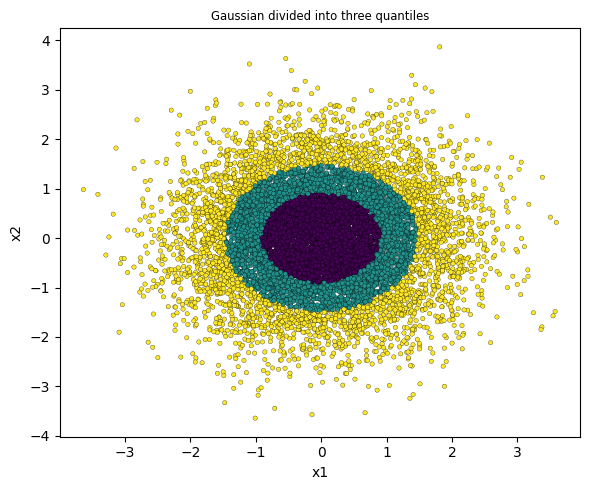

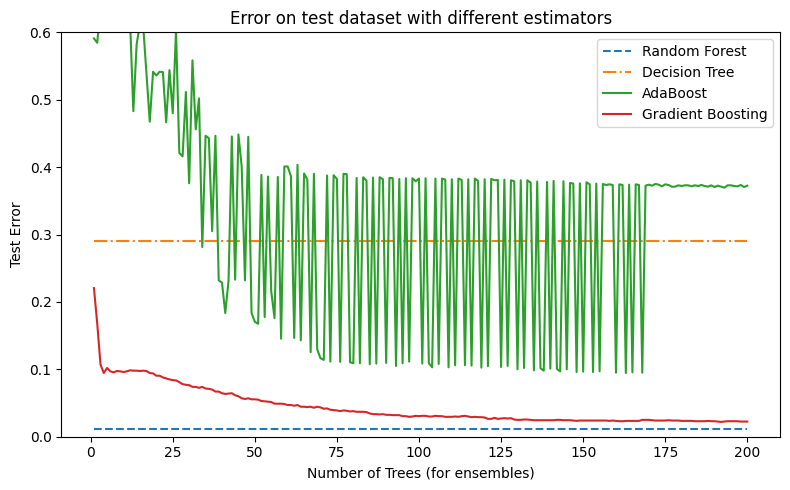

In [4]:

X, y = make_gaussian_quantiles(n_samples=10000, n_features=2, n_classes=3, random_state=19)

# TODO 1 - Realizați împărțirea setului de date în train și test
split_percent = 0.8
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 - split_percent, random_state=42, stratify=y
)

# TODO 2 - Definiți modelele și dați valori parametrilor (importanți) ai acestora
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

random_forest = RandomForestClassifier(
    n_estimators=200, random_state=42, n_jobs=-1
)

adaboost = AdaBoostClassifier(
    n_estimators=200, learning_rate=0.5, algorithm='SAMME', random_state=42
)

gradient_boosting = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42
)

# TODO 3 - Antrenați modelele pe seturile de date
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# TODO 4 - Determinați valorile prezise de modele pe datele de test și calculați erorile
adaboost_errors = [1.0 - accuracy_score(y_test, y_pred) 
                   for y_pred in adaboost.staged_predict(X_test)]
gradient_boosting_errors = [1.0 - accuracy_score(y_test, y_pred) 
                            for y_pred in gradient_boosting.staged_predict(X_test)]

decision_tree_error = 1.0 - accuracy_score(y_test, decision_tree.predict(X_test))
random_forest_error = 1.0 - accuracy_score(y_test, random_forest.predict(X_test))

N = max(len(adaboost_errors), len(gradient_boosting_errors))
random_forest_errors = [random_forest_error] * N
decision_tree_errors = [decision_tree_error] * N

print(f"Test error (Decision Tree): {decision_tree_error:.4f}")
print(f"Test error (Random Forest): {random_forest_error:.4f}")
print(f"Final test error (AdaBoost, {len(adaboost_errors)} estimators): {adaboost_errors[-1]:.4f}")
print(f"Final test error (GradientBoosting, {len(gradient_boosting_errors)} estimators): {gradient_boosting_errors[-1]:.4f}")

plt.figure(figsize=(6, 5))
plt.title("Gaussian divided into three quantiles", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=10, edgecolor='k', linewidths=0.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(random_forest_errors) + 1), random_forest_errors, linestyle='dashed', label='Random Forest')
plt.plot(range(1, len(decision_tree_errors) + 1), decision_tree_errors, linestyle='-.', label='Decision Tree')
plt.plot(range(1, len(adaboost_errors) + 1), adaboost_errors, linestyle='-', label='AdaBoost')
plt.plot(range(1, len(gradient_boosting_errors) + 1), gradient_boosting_errors, linestyle='-', label='Gradient Boosting')
plt.legend()
plt.ylim(0.0, 0.6)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees (for ensembles)')
plt.title("Error on test dataset with different estimators")
plt.tight_layout()
plt.show()


Error evolution (AdaBoost):
  n_estimators=10   test_error=0.6175
  n_estimators=50   test_error=0.1705
  n_estimators=100  test_error=0.3830
  n_estimators=200  test_error=0.3725
  n_estimators=400  test_error=0.3635

Evoluția erorii (GradientBoosting):
  n_estimators=10   test_error=0.0960
  n_estimators=50   test_error=0.0555
  n_estimators=100  test_error=0.0305
  n_estimators=200  test_error=0.0225
  n_estimators=400  test_error=0.0200


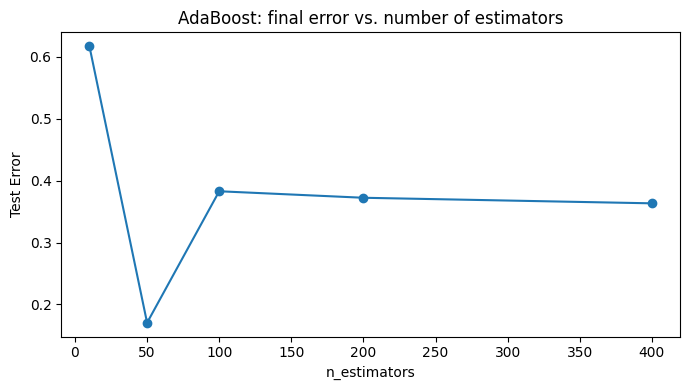

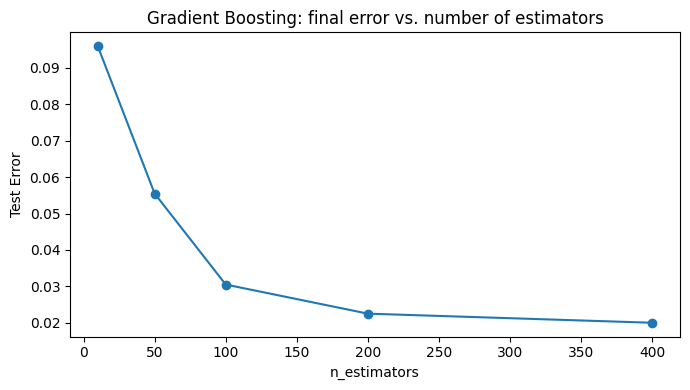

In [5]:

# TODO 5 - Variați numărul de estimatori (și alți parametri relevanți) ai metodelor cu ansamblu și explicați rezultatele

def final_error_for_estimators(model_name, est_list, **kwargs):
    results = []
    for n in est_list:
        if model_name == "AdaBoost":
            model = AdaBoostClassifier(n_estimators=n, learning_rate=kwargs.get("learning_rate", 0.5),
                                       algorithm='SAMME', random_state=42)
        elif model_name == "GradientBoosting":
            model = GradientBoostingClassifier(n_estimators=n, learning_rate=kwargs.get("learning_rate", 0.1),
                                               max_depth=kwargs.get("max_depth", 3), random_state=42)
        else:
            raise ValueError("Unknown model.")
        model.fit(X_train, y_train)
        err = 1.0 - accuracy_score(y_test, model.predict(X_test))
        results.append((n, err))
    return results

est_grid = [10, 50, 100, 200, 400]

ada_results = final_error_for_estimators("AdaBoost", est_grid, learning_rate=0.5)
gbr_results = final_error_for_estimators("GradientBoosting", est_grid, learning_rate=0.1, max_depth=3)

print("Error evolution (AdaBoost):")
for n, err in ada_results:
    print(f"  n_estimators={n:<3d}  test_error={err:.4f}")

print("\nEvoluția erorii (GradientBoosting):")
for n, err in gbr_results:
    print(f"  n_estimators={n:<3d}  test_error={err:.4f}")

plt.figure(figsize=(7, 4))
plt.plot([n for n, _ in ada_results], [err for _, err in ada_results], marker='o', linestyle='-')
plt.title("AdaBoost: final error vs. number of estimators")
plt.xlabel("n_estimators")
plt.ylabel("Test Error")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot([n for n, _ in gbr_results], [err for _, err in gbr_results], marker='o', linestyle='-')
plt.title("Gradient Boosting: final error vs. number of estimators")
plt.xlabel("n_estimators")
plt.ylabel("Test Error")
plt.tight_layout()
plt.show()



**Explicații (TODO 5):**  
În general, pe acest set sintetic, creșterea numărului de estimatori (arbori) tinde să reducă eroarea până la un punct, după care câștigurile devin marginale sau pot apărea ușoare fluctuații datorită aleatorietății și potențialului de supraînvățare.  
*AdaBoost* cu rate de învățare mai mari converge mai rapid, dar poate oscila; *Gradient Boosting* cu o rată de învățare mai mică are, de regulă, o evoluție mai stabilă, necesitând mai mulți estimatori pentru performanțe similare.



## 4. Noțiuni teoretice despre Cross-Validation
După cum știm din laboratoarele trecute, seturile de date trebuie împărțite (aleator) în (minim) două sub-seturi de date: unul pentru _antrenare_ și unul pentru _testare_. Motivul acestei împărțiri este că ne dorim să aflăm comportamentul modelului antrenat pe un set de date necunoscut (neutilizat la antrenare) pentru a estima care este capacitatea acestuia de a generaliza (cum se va comporta pe date complet noi odată ce va fi pus în producție). 

În cazul în care modelul clasifică foarte bine setul de antrenare dar greșește foarte mult pe setul de test, avem o indicație clară că modelul suferă de „overfitting”. Mai mult, pentru unii algoritmi este nevoie să căutăm anumite valori de hiper-parametri. De exemplu, câți clasificatori sunt suficienți pentru o metodă tip ansamblu pentru a obține performanțe maxime ;). Dacă testăm doar cu cele două sub-seturi (antrenare și test) riscăm să ajungem la overfitting întrucât nu vom fi siguri dacă pe date noi am făcut cea mai bună alegere de hiper-parametri. Soluția o reprezintă împărțirea setului inițial în 3 seturi de data: antrenare, _validare_ și testare. Modelele vor învăța din setul de antrenare, vom căuta valorile bune pentru hiper-parametri folosinde setul de validare și vom testa capacitatea de generalizare folosind setul de testare.

Cu toate acestea, dacă am dori să ne asigurăm că fiecare set de date este suficient de mare pentru a fi relevant ar însemna să micșorăm semnificativ setul de antrenare (echilibrând ca dimensiune pe cele de validare și testare). Mai mult, este posibil ca însăși repartizarea aleatoare a datelor în cele 3 sub-seturi să producă dezechilibre, unele clase ajungând să nu fie corect reprezentate din punct de vedere al frecvenței (sunt puține exemple într-un sub-set relativ la câte exemple erau din clasa respectivă în setul inițial).

O metodă care ameliorează aceste probleme este **cross-validation**. Practic, setul de date se va împărți întâi în două. O parte o păstrăm pentru testarea finală, urmând ca cealaltă parte (de obicei, mai mare) să fie folosită pentru antrenare și validare. Fracția de date pentru antrenare și validare este apoi separată în **k-folds** (în $k$ sub-seturi). Pe rând, $k-1$ dintre ele sunt folosite pentru antrenarea modelului în timp ce al $k$-lea este utilizat pentru validare. Procesul va întoarce valoarea medie a metricii dorite pentru fiecare astfel de pas de antrenare.

![Cross-Validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png "Cross-Validation Example")



## 5. Cerințe (Partea II) [2p]
Modificați implementarea de la [Partea I](#cerinte-1) pentru a utiliza **k-fold cross-validation**. Încercați cu diferite valori ale lui $k$. Este recomandată utilizarea funcției _cross_val_score_.

Atenție! Este de ajuns să calculați scorul de cross-validation pe modelul „final” în cazul metodelor cu ansamblu (nu e nevoie de staged_predict). Prin urmare, veți compara doar valori de _acuratețe_ între modele.


In [6]:

# Vom utiliza un set de date 2D generat pe baza unei distribuții Gausiene
X, y = make_gaussian_quantiles(n_samples=10000, n_features=2, n_classes=3, random_state=19)

# TODO 6 - Definiți modelele pe care doriți să faceți cross-validation (cu hiper-parametri doriți)
decision_tree_cv = DecisionTreeClassifier(max_depth=5, random_state=42)
random_forest_cv = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
adaboost_cv = AdaBoostClassifier(n_estimators=300, learning_rate=0.5, algorithm='SAMME', random_state=42)
gradient_boosting_cv = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)

models_cv = {
    "DecisionTree": decision_tree_cv,
    "RandomForest": random_forest_cv,
    "AdaBoost": adaboost_cv,
    "GradientBoosting": gradient_boosting_cv,
}

# TODO 7 - Aplicați cross-validation pe fiecare din modelele definite mai sus. Afișați media și deviația standard
k_values = [3, 5, 10]
for k in k_values:
    print(f"\n=== k-fold cross-validation (k={k}) ===")
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for name, model in models_cv.items():
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
        print(f"{name:>17s}  accuracy: mean={scores.mean():.4f}  std={scores.std():.4f}")




=== k-fold cross-validation (k=3) ===
     DecisionTree  accuracy: mean=0.7113  std=0.0088
     RandomForest  accuracy: mean=0.9848  std=0.0011
         AdaBoost  accuracy: mean=0.6381  std=0.0007
 GradientBoosting  accuracy: mean=0.9776  std=0.0004

=== k-fold cross-validation (k=5) ===
     DecisionTree  accuracy: mean=0.7085  std=0.0101
     RandomForest  accuracy: mean=0.9857  std=0.0015
         AdaBoost  accuracy: mean=0.6362  std=0.0030
 GradientBoosting  accuracy: mean=0.9773  std=0.0030

=== k-fold cross-validation (k=10) ===
     DecisionTree  accuracy: mean=0.7136  std=0.0115
     RandomForest  accuracy: mean=0.9856  std=0.0046
         AdaBoost  accuracy: mean=0.6359  std=0.0046
 GradientBoosting  accuracy: mean=0.9778  std=0.0055


In [7]:

# TODO 8 - Variați numărul de atribute (features) și numărul de clase din setul de date și explicați rezultatele.
import pandas as pd
from IPython.display import display

features_list = [2, 5]
classes_list = [2, 3, 5]
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

rows = []
for f in features_list:
    for c in classes_list:
        X_var, y_var = make_gaussian_quantiles(n_samples=8000, n_features=f, n_classes=c, random_state=19)
        model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
        scores = cross_val_score(model, X_var, y_var, scoring='accuracy', cv=skf, n_jobs=-1)
        rows.append({
            "features": f,
            "classes": c,
            f"acc_mean(k={k})": scores.mean(),
            f"acc_std(k={k})": scores.std()
        })

df_results = pd.DataFrame(rows).sort_values(by=["features","classes"]).reset_index(drop=True)
display(df_results)


,features,classes,acc_mean(k=5),acc_std(k=5)
0,2,2,0.988500,0.005009
1,2,3,0.975250,0.003721
2,2,5,0.947125,0.004268
3,5,2,0.965125,0.004246
4,5,3,0.912750,0.004517
5,5,5,0.766875,0.005244



**Explicații (TODO 8):**  
În general, pe același număr de eșantioane:
- Creșterea **numărului de clase** face sarcina mai dificilă, iar acuratețea scade de regulă.
- Creșterea **numărului de atribute (features)** poate ajuta dacă semnalul util există pe dimensiuni suplimentare; altfel poate îngreuna antrenarea (spațiu mai mare, potențial mai mult zgomot). Pe seturile sintetice Gaussian quantiles, mai multe atribute pot separa mai bine clasele și pot îmbunătăți scorul, dar efectul depinde de felul în care sunt generate datele.



## Referințe
[1] Freund, Yoav, and Robert E. Schapire. "A desicion-theoretic generalization of on-line learning and an application to boosting." In European conference on computational learning theory, pp. 23-37. Springer, Berlin, Heidelberg, 1995.

[2] Freund, Yoav, and Robert E. Schapire. "Experiments with a new boosting algorithm." In icml, vol. 96, pp. 148-156. 1996.



## Resurse

* http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf
* https://scikit-learn.org/stable/modules/cross_validation.html
